# Project - Creating and Analyzing Stock Indexes

### __Project Description__

This project is about creating and analyzing stock indexes and consists of the following tasks:

- Importing the us stocks dataset (__us_stocks.csv__) and selecting the 5-Year period from __31-12-2013__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__.
- __Creating__ the __Price-weighted__ (Price Return) Index (starting at a Base Value of 100)!
- __Creating__ the __Value-weighted__ (Price Return) Index (starting at a Base Value of 100)! __Import__ the __listings_clean.csv__ dataset for calculating the __Market Caps__! Use the __simplified assumption__ that the amount of __shares outstanding do not change__ over time!
- __Plotting__ PWI and VWI and __comparing them__!


So, let's start by defining what a stock index is.

### Definition: Stock Index

_,,In finance, a stock index, or stock market index, is an index that measures the performance of a stock market, or of a subset of a stock market. It helps investors compare current stock price levels with past prices to calculate market performance."_

https://en.wikipedia.org/wiki/Stock_market_index

In [ ]:
# Get the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-45-cc323dce54c2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### __Import the us stocks dataset (us_stocks.csv)__

In [ ]:
# Import the us stocks dataset (us_stocks.csv) and save the DataFrame in the variable stocks
stocks = pd.read_csv('/content/drive/MyDrive/us_stocks.csv', header=[0,1], index_col=[0], parse_dates=[0])['Close']

In [ ]:
# Select the 5-Year period from 31-12-2013 (incl.) until 31-12-2018 (incl.)
stocks = stocks.loc['31-12-2013':'31-12-2018'].copy()
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,90.73,54.65,25.96,97.03,81.41,78.69
2014-01-02,89.45,54.71,25.79,96.41,80.54,78.91
2014-01-03,89.74,54.56,25.78,96.54,80.45,78.65
2014-01-06,89.70,57.20,25.46,95.85,80.64,78.21
2014-01-07,89.36,57.92,25.59,96.38,81.42,78.45


In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2013-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     1258 non-null   float64
 1   FB      1258 non-null   float64
 2   INTC    1258 non-null   float64
 3   MCD     1258 non-null   float64
 4   PG      1258 non-null   float64
 5   WMT     1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


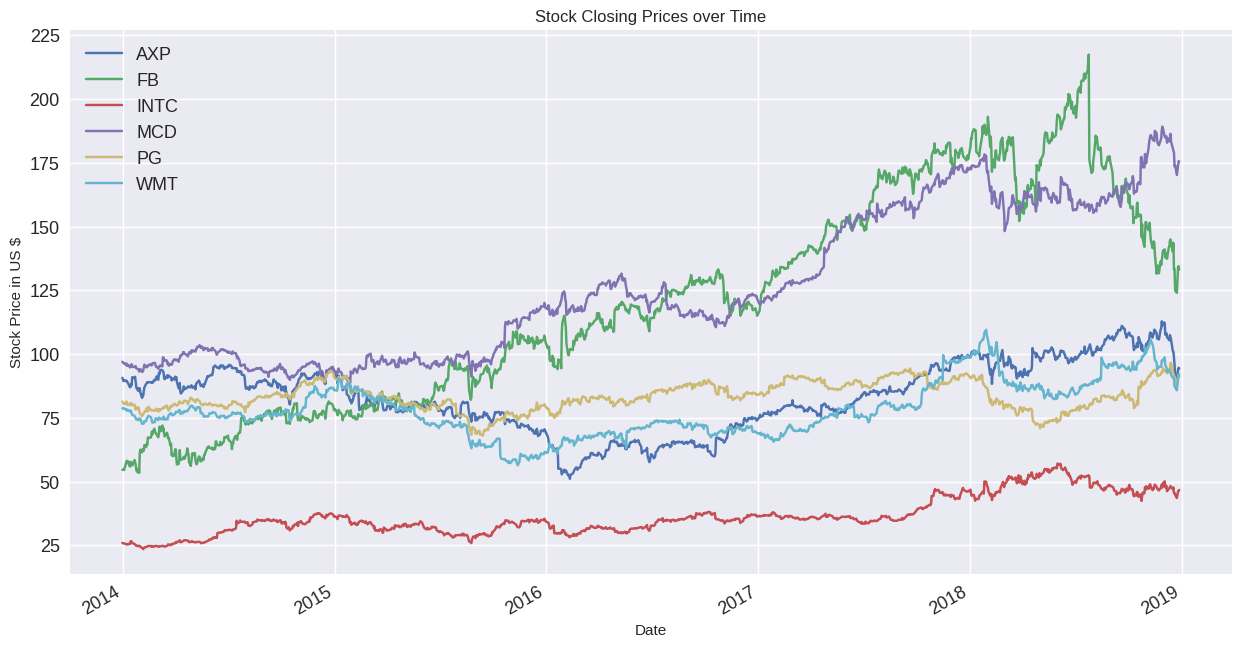

In [ ]:
# Let's get an overview of the evolution of stock prices.
stocks.plot(figsize=(15,8), fontsize=13)
plt.title('Stock Closing Prices over Time')
plt.ylabel('Stock Price in US $')
plt.legend(fontsize=13)
plt.show()

A disatvantage of the plot above is that every stock has a different starting point. This makes it difficult to decide which stock performs best in terms of returns. To handle this problem we use rebasing, to normalize all stocks.

In [ ]:
# Rebasing all stocks to the same starting point of 100, allows a quick comparison
norm = stocks.div(stocks.iloc[0] ).mul(100)
norm.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69


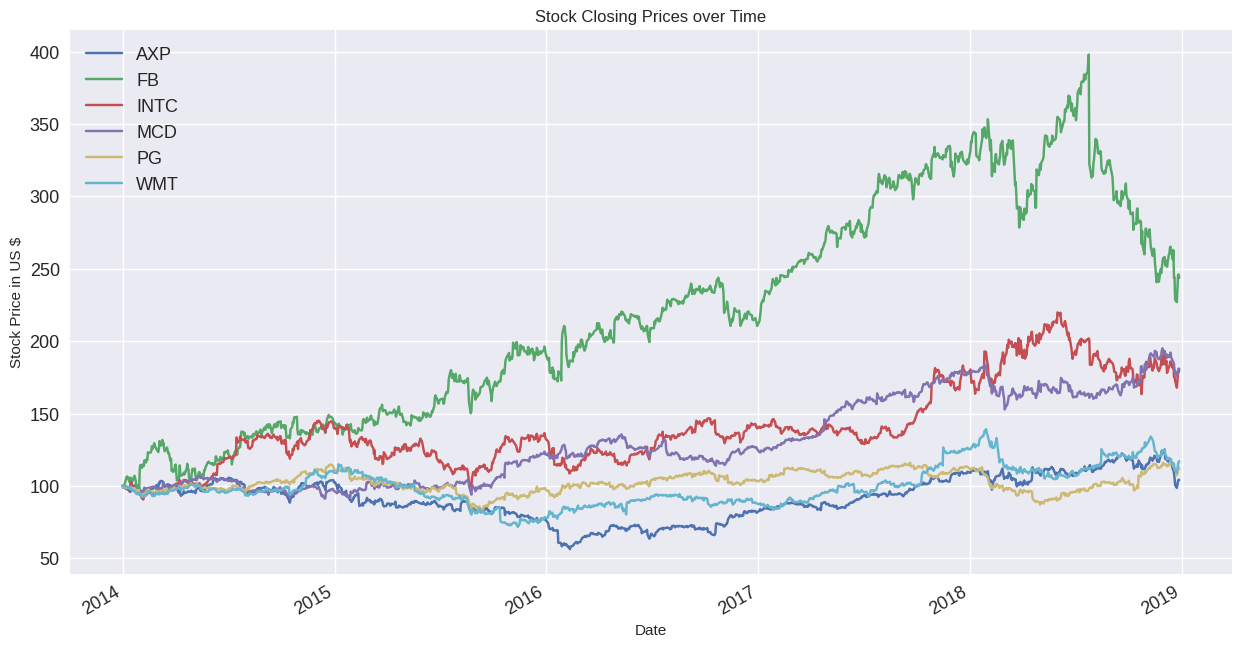

In [ ]:
# Since the stock prices normalized, we can compare them graphically
norm.plot(figsize=(15,8), fontsize=13)
plt.title('Stock Closing Prices over Time')
plt.ylabel('Stock Price in US $')
plt.legend(fontsize=13)
plt.show()

As the plot shows, the Facebook (FB) stock has the best performance in terms of return.

### __Create the Price-weighted (Price Return) Index (starting at a Base Value of 100)__

We compute the Price Weighted Index at timestamp $t_{n}$ by the folowing formular:

$$ PWI_{t_n} = \frac{Sum\ of \ Stock \ Prices \ in \ the \ Index \ at \ t_{n} }{Sum\ of \ Stock \ Prices \ in \ the \ Index \ at \ t_{0} }$$

In [ ]:
# We apply the formular from above to calculate the Price Weighted Index. The factor 100 at the end serves to normalize
norm['PWI'] = stocks.sum(axis=1).div(stocks.sum(axis=1)[0]).mul(100)
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI
Date,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15


In [ ]:
norm.tail()

,AXP,FB,INTC,MCD,PG,WMT,PWI
Date,,,,,,,
2018-12-21,100.66,228.64,172.73,179.48,111.74,110.73,143.15
2018-12-24,98.64,227.01,167.91,175.49,107.31,109.06,140.18
2018-12-26,103.43,245.53,177.93,179.36,110.66,114.89,146.74
2018-12-27,104.35,246.15,178.58,181.09,113.03,116.39,148.17
2018-12-28,104.07,243.73,180.08,180.93,112.00,117.08,147.79


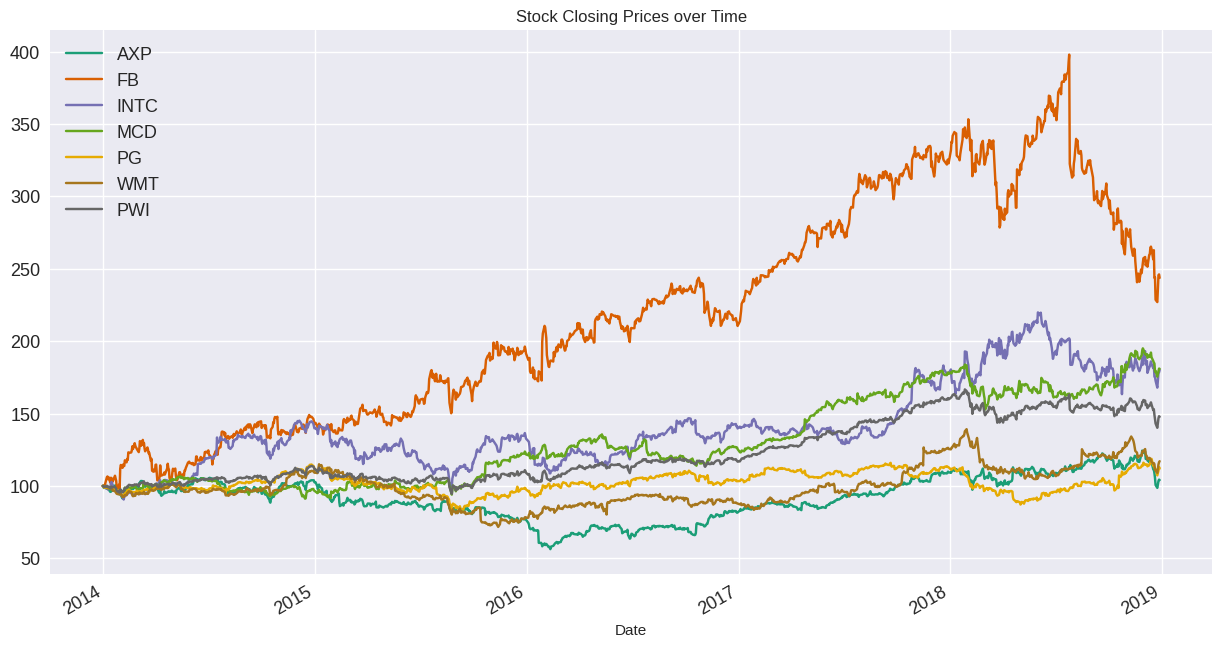

In [ ]:
# After calculating the Price Weighted Index, we can compare the Price Weighted Index together with the single stocks
norm.plot(figsize=(15,8), fontsize=13, colormap = 'Dark2')
plt.title('Stock Closing Prices over Time')
plt.legend(fontsize=13)
plt.show()

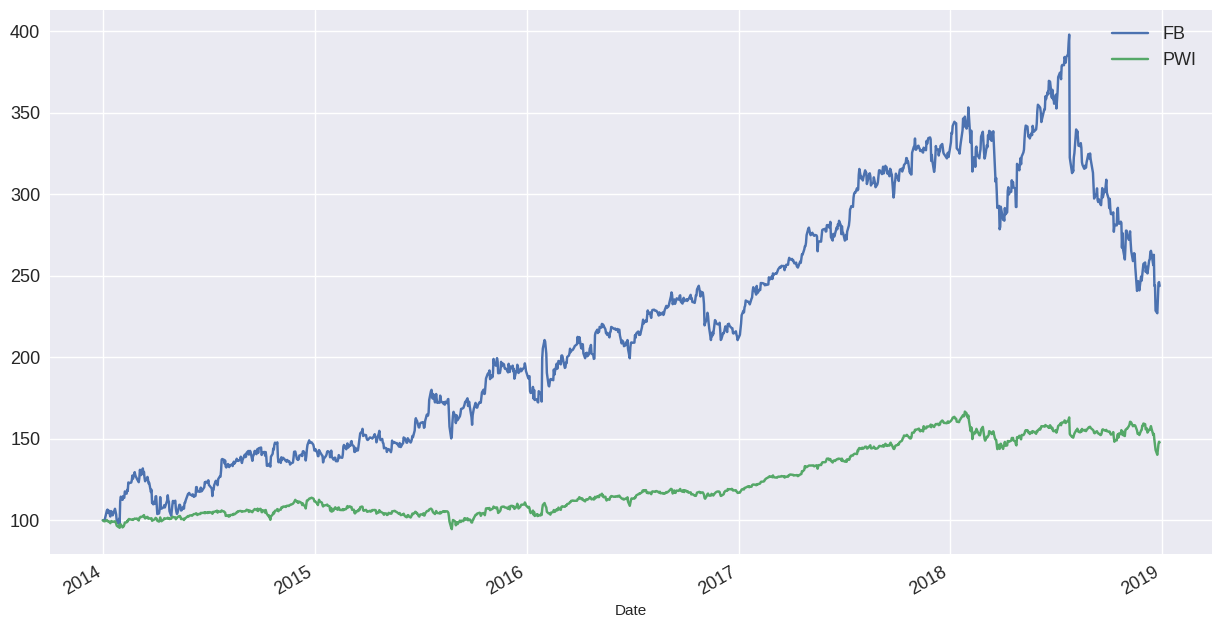

In [ ]:
# Let's compare the Price Weighted Index with the best performing stock, which was the Facebook (FB) stock
norm.loc[:,['FB', 'PWI']].plot(figsize=(15,8), fontsize=13)
plt.legend(fontsize=13)
plt.show()

### __Create the Value Weighted (Price Return) Index (starting at a Base Value of 100)__

__Value Weighted Index (VWI)__

_Constituentes are weighted in proportion to their Market Capitalization (= companie's total equity value)._

__Market Capitalization__

_Market capitalization, or "market cap," represents the total dollar market value of a company's outstanding shares of stock. Investors use this figure to determine a company's size instead of sales or total asset value. In an acquisition, the market cap helps determine whether a takeover candidate represents a good value for the acquirer._

https://www.investopedia.com/terms/m/marketcapitalization.asp

We can calculate the Market Capitalization be the formular below.

$$ Market \ Capitalization = Stock \ Price * Shares \ Outstanding $$

__How to calculate the Value Weighted Index__

If we have calculated the Market Capitalization for each timestamp. For a portfolio with $i=1,…,n$ stocks, we calculate the weights for a Value Weighted Index for stock $i$ as following:


$$ Weight \ for \ Stock \ i  = \frac{Market \ Capitalization \ for \ Stock \ i}{\sum_{j=1}^{n} Market \ Capitalization \ for \ Stock \ j} $$

__Cumulative Returns__

_,,Cumulative returns are the total gain or loss on an investment over a particular period, taking into account the effect of compounding. It measures the performance of an investment from its inception to the present day, including all dividends or interest payments reinvested. Cumulative returns are expressed as a percentage and can be positive or negative."_

https://fastercapital.com/startup-topic/Understanding-Cumulative-Returns.html

__How to calculate Cummulative Investment Mutiple__

- For a stock on a given period $t$, with $t=1,\dots,m$, the stock price at that period is gven by $sp_{t}$.  We then calculate the return __return__ $ret_{t}$ at that period using the following formula:

$$ret_{t}=\frac{sp_{t}- sp_{t-1}}{sp_{t-1}}$$

- Assuming we have a sequence of timestamps $t$, where $t=1,\dots,m$. Let us further assume we have a portfolio of $n$ stocks, so that we denote the return for a single stock on timestamp $t$ by $ret_{ti}$, with $i=1,\dots,n$. Moreover $w_{ti}$ denotes the weight for stock $i$ at timestamp $t$.
Then we calculate Cummulative Investment Multiple $CIM_{m}$ at timestamp $t=m$ for that portfolio by:

$$ CIM_{m} = 100\prod_{t=1}^{m}((\sum_{i=1}^{n}ret_{ti}w_{ti})+1)$$

In [ ]:
# The information about the market capitalization is not contained inside the stock dataframe.
# To obtain this information we have to import the listings_clean.csv file
listings = pd.read_csv('/content/drive/MyDrive/listings_clean.csv')

In [ ]:
listings.head()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
2,AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
3,AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
4,AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [ ]:
listings.tail()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
6847,ZUMZ,NASDAQ,Zumiez Inc.,26.72,681919062.56,2005,Consumer Services,Clothing/Shoe/Accessory Stores
6848,ZUO,NYSE,"Zuora, Inc.",19.79,2147266454.00,2018,Technology,Computer Software: Prepackaged Software
6849,ZYME,NYSE,Zymeworks Inc.,15.74,504078206.26,2017,Health Care,Major Pharmaceuticals
6850,ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.85,165399468.60,2015,Health Care,Major Pharmaceuticals
6851,ZYXI,NASDAQ,"Zynex, Inc.",5.02,161834880.48,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852 entries, 0 to 6851
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6852 non-null   object 
 1   Exchange    6852 non-null   object 
 2   Name        6852 non-null   object 
 3   Last_Price  6852 non-null   float64
 4   Market_Cap  5954 non-null   float64
 5   IPO_Year    6852 non-null   int64  
 6   Sector      5309 non-null   object 
 7   Industry    5309 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 428.4+ KB


In [ ]:
# We have to reset the index to the Symbols column, since we want to access the stocks from the stocks DataFrame by it's symbol names.
listings.set_index('Symbol', inplace=True)

In [ ]:
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [ ]:
# We are only intrested to calculate the market capitalization for stocks that are contained in the stock DataFrame above.
# We display the symbols of those stocks together with it's company names
for symbol in stocks.columns:
  print('Symbol: ', symbol, '  Name: ',listings.loc[symbol]['Name'])

Symbol:  AXP   Name:  American Express Company
Symbol:  FB   Name:  Facebook, Inc.
Symbol:  INTC   Name:  Intel Corporation
Symbol:  MCD   Name:  McDonald&#39;s Corporation
Symbol:  PG   Name:  Procter & Gamble Company (The)
Symbol:  WMT   Name:  Walmart Inc.


In [ ]:
ticker = list(stocks.columns)
ticker

['AXP', 'FB', 'INTC', 'MCD', 'PG', 'WMT']

In [ ]:
# We are only intrested in the Last_Price column and the Market_Cap column, because we want to calculate the outstanding shares.
# That's why we select those columns
listings = listings.loc[ticker, ['Last_Price', 'Market_Cap']]

In [ ]:
listings

,Last_Price,Market_Cap
Symbol,,
AXP,110.16,92396447733.60
FB,177.82,507496466236.00
INTC,55.75,250800765641.50
MCD,189.22,144813345561.04
PG,104.65,261790316546.85
WMT,99.60,285820549308.00


In [ ]:
# Now, we calculate the outstanding shares
listings['Shares'] = listings['Market_Cap'].div(listings['Last_Price'])

In [ ]:
listings

,Last_Price,Market_Cap,Shares
Symbol,,,
AXP,110.16,92396447733.60,838747710.00
FB,177.82,507496466236.00,2853989800.00
INTC,55.75,250800765641.50,4498668442.00
MCD,189.22,144813345561.04,765317332.00
PG,104.65,261790316546.85,2501579709.00
WMT,99.60,285820549308.00,2869684230.00


In [ ]:
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI
Date,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15


In [ ]:
# Compute the market capitalization by using the the formular above
# For the sake of simplicity, we use the simplified assumption that the amount of shares outstanding do not change over time!
mcap = stocks.mul(listings['Shares'], axis='columns')

In [ ]:
mcap.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,76099582244.54,155970548277.98,116785428255.65,74258739958.64,203653614116.01,225815457798.07
2014-01-02,75025980143.26,156141779104.01,116020663617.85,73784247039.39,201477232264.44,226446794068.04
2014-01-03,75269217817.90,155713686341.99,115975676933.43,73883735996.60,201252080084.31,225700670428.87
2014-01-06,75235667070.76,163248219413.99,114536094034.65,73355664741.57,201727385232.18,224438000758.62
2014-01-07,74950496204.35,165303083508.02,115120925430.78,73761282162.21,203678614903.62,225126719234.45


In [ ]:
mcap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2013-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     1258 non-null   float64
 1   FB      1258 non-null   float64
 2   INTC    1258 non-null   float64
 3   MCD     1258 non-null   float64
 4   PG      1258 non-null   float64
 5   WMT     1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


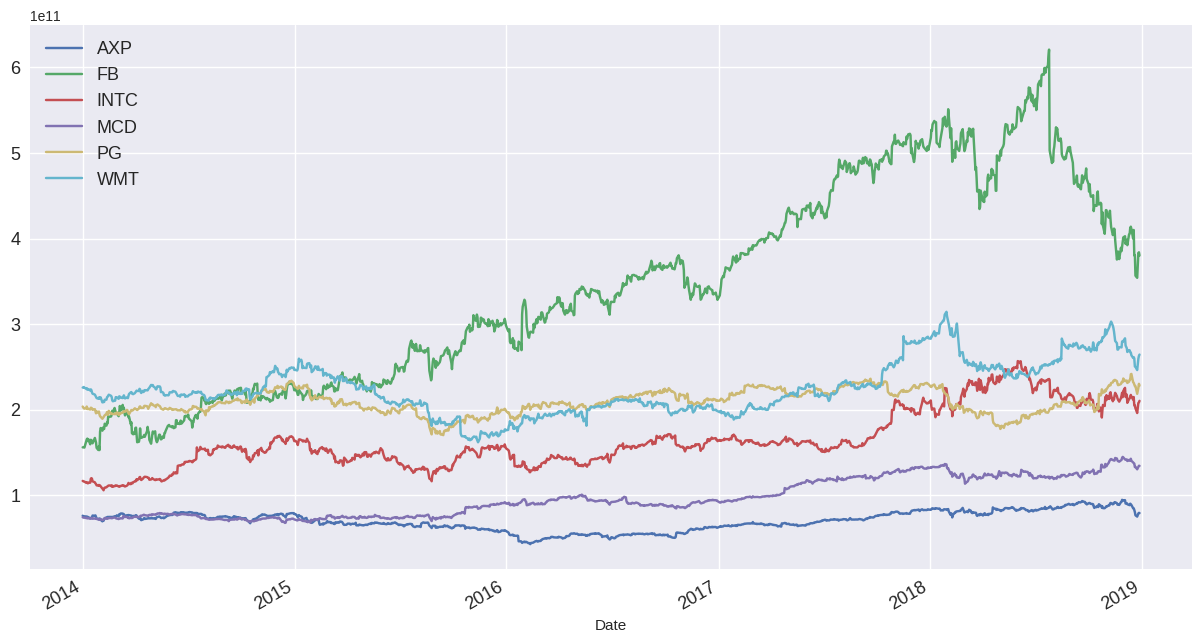

In [ ]:
# Lets visualize the market capitalizations for all stocks
mcap.plot(figsize=(15,8), fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [ ]:
# We calculate the weights for Value Weighted Index as in the formular at the beginning of this section and store it in a DataFrame called weights_vwi
weights_vwi = mcap.div(mcap.sum(axis=1), axis='index')

In [ ]:
# Display the weights for all stocks at each timestamp
weights_vwi.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,0.09,0.18,0.14,0.09,0.24,0.26
2014-01-02,0.09,0.18,0.14,0.09,0.24,0.27
2014-01-03,0.09,0.18,0.14,0.09,0.24,0.27
2014-01-06,0.09,0.19,0.13,0.09,0.24,0.26
2014-01-07,0.09,0.19,0.13,0.09,0.24,0.26


In [ ]:
# Display the weights for all stocks at each timestamp
weights_vwi.tail()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2018-12-21,0.06,0.29,0.16,0.11,0.18,0.20
2018-12-24,0.06,0.29,0.16,0.11,0.18,0.20
2018-12-26,0.06,0.30,0.16,0.10,0.18,0.20
2018-12-27,0.06,0.30,0.16,0.10,0.18,0.20
2018-12-28,0.06,0.29,0.16,0.10,0.18,0.20


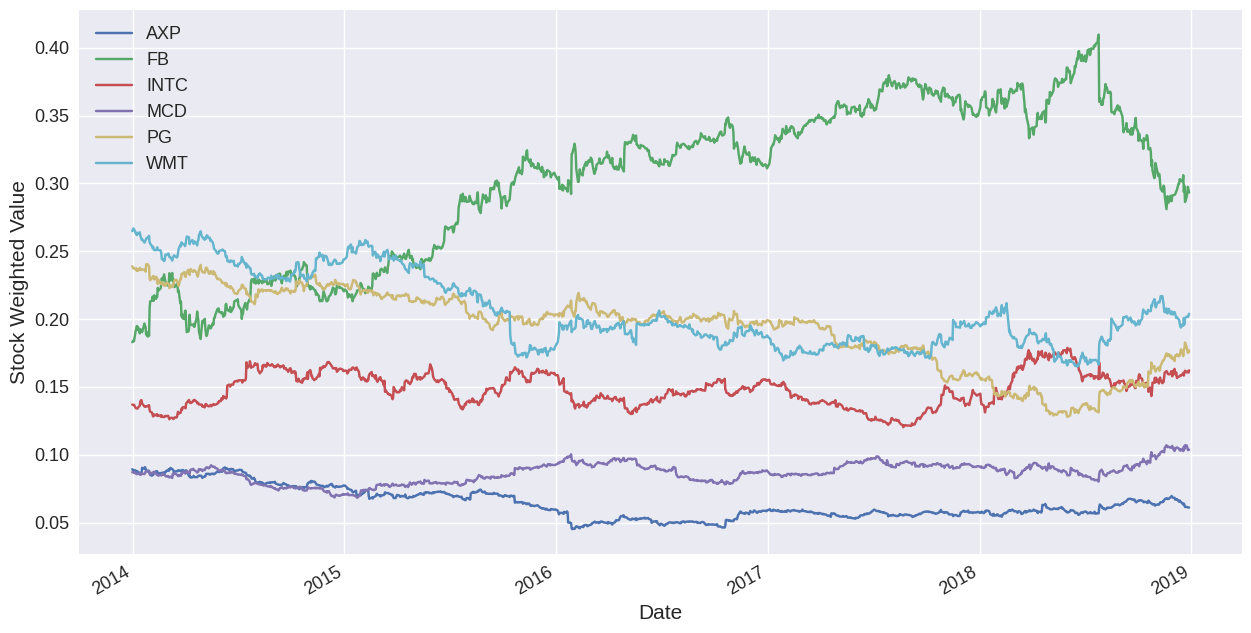

In [ ]:
# Lets visualize the evolution of weights for each stock over time
weights_vwi.plot(figsize=(15,8), fontsize=13)
plt.legend(fontsize=13)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stock Weighted Value', fontsize=15)
plt.show()

In [ ]:
# Lets calculate the daily returns of our stock prices
ret = stocks.pct_change()
ret

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.01,0.00,-0.01,-0.01,-0.01,0.00
2014-01-03,0.00,-0.00,-0.00,0.00,-0.00,-0.00
2014-01-06,-0.00,0.05,-0.01,-0.01,0.00,-0.01
2014-01-07,-0.00,0.01,0.01,0.01,0.01,0.00
...,...,...,...,...,...,...
2018-12-21,-0.05,-0.06,-0.02,0.00,-0.00,-0.00
2018-12-24,-0.02,-0.01,-0.03,-0.02,-0.04,-0.02
2018-12-26,0.05,0.08,0.06,0.02,0.03,0.05


In [ ]:
# We want to avoid to multiply the weights at the end of the 31st of december with the return on the second of january.
# Because we want to multiply the weights at the second of january with the return on the second of january.
# In order to do this we shift the index of the weights be one timestamp
weights_vwi.shift().dropna()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2014-01-02,0.09,0.18,0.14,0.09,0.24,0.26
2014-01-03,0.09,0.18,0.14,0.09,0.24,0.27
2014-01-06,0.09,0.18,0.14,0.09,0.24,0.27
2014-01-07,0.09,0.19,0.13,0.09,0.24,0.26
2014-01-08,0.09,0.19,0.13,0.09,0.24,0.26
...,...,...,...,...,...,...
2018-12-21,0.06,0.30,0.16,0.10,0.18,0.20
2018-12-24,0.06,0.29,0.16,0.11,0.18,0.20
2018-12-26,0.06,0.29,0.16,0.11,0.18,0.20


In [ ]:
# Calculating the daily returns of our weighted index for each single timestamp
ret.mul(weights_vwi.shift().dropna()).sum(axis=1)

Date
2013-12-31    0.00
2014-01-02   -0.00
2014-01-03   -0.00
2014-01-06    0.01
2014-01-07    0.01
              ... 
2018-12-21   -0.02
2018-12-24   -0.02
2018-12-26    0.05
2018-12-27    0.01
2018-12-28   -0.00
Length: 1258, dtype: float64

In [ ]:
# Create a column in our norm dataframe
norm['VWI'] = 100
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI,VWI
Date,,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38,100
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36,100
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67,100
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15,100


In [ ]:
# Overwrite the column by the cummulative investment mutiple for each time stamp
# We multiply with 100, since we're starting with a base value of 100
norm.iloc[:,-1] = ret.mul(weights_vwi.shift().dropna()).sum(axis=1).add(1).cumprod().mul(100)

In [ ]:
# Display the DataFrame
norm

,AXP,FB,INTC,MCD,PG,WMT,PWI,VWI
Date,,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38,99.57
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36,99.44
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67,100.00
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15,100.63
...,...,...,...,...,...,...,...,...
2018-12-21,100.66,228.64,172.73,179.48,111.74,110.73,143.15,146.12
2018-12-24,98.64,227.01,167.91,175.49,107.31,109.06,140.18,143.14
2018-12-26,103.43,245.53,177.93,179.36,110.66,114.89,146.74,151.01


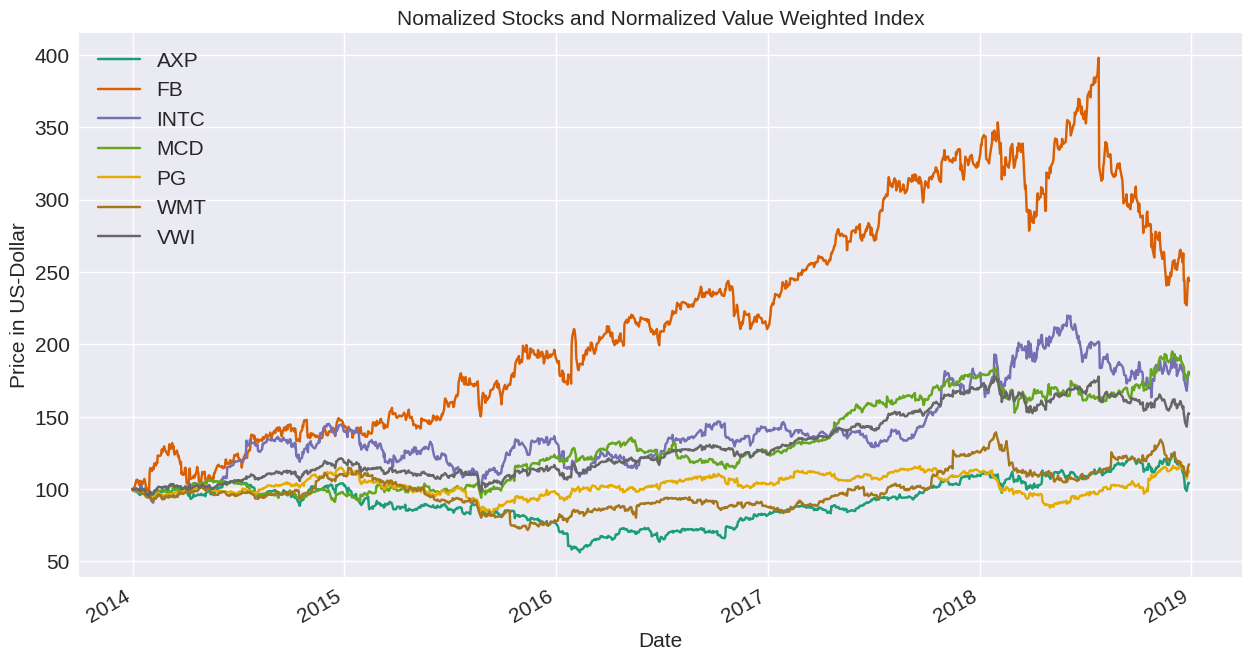

In [ ]:
# Visualize the created Value Weighted Index together with its 6 constituents
norm.iloc[:, [0,1,2,3,4,5,7]].plot(figsize=(15,8), fontsize=15, colormap='Dark2')
plt.title('Nomalized Stocks and Normalized Value Weighted Index', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in US-Dollar', fontsize=15)
plt.show()

### __Plot PWI and VWI and compare__

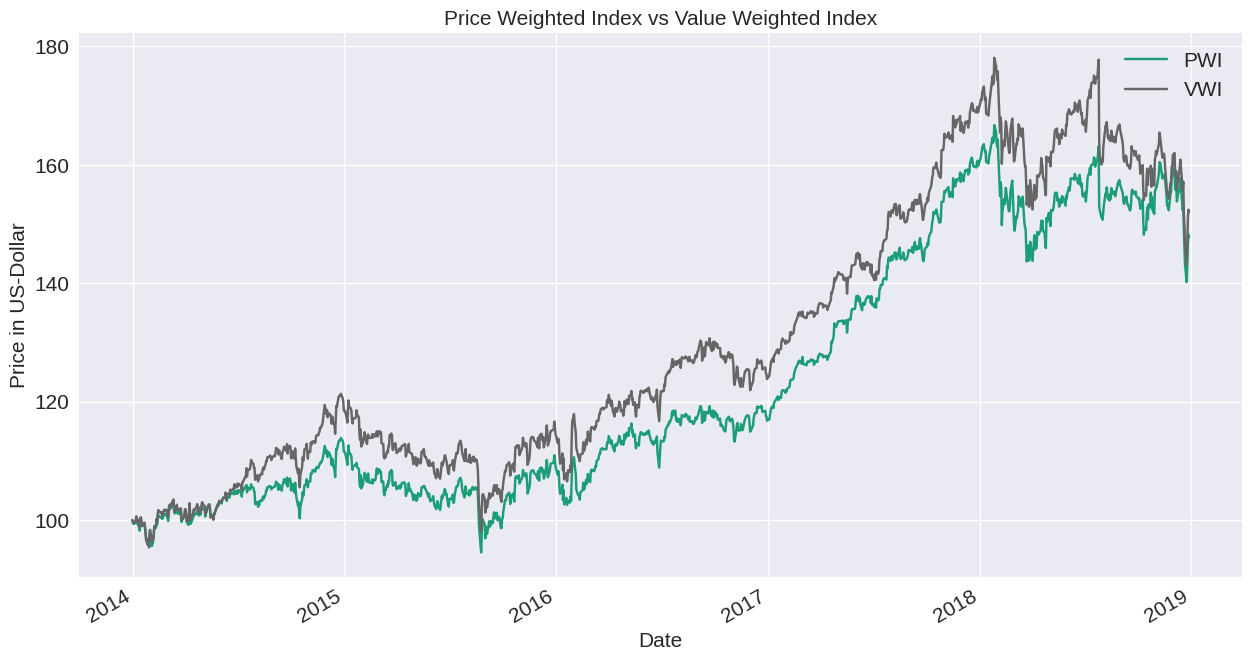

In [ ]:
# Visualize evolution of PWI and VWI over time
norm.iloc[:,-2:].plot(figsize=(15,8), fontsize=15, colormap='Dark2')
plt.title('Price Weighted Index vs Value Weighted Index', fontsize=15)
plt.legend(fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price in US-Dollar', fontsize=15)
plt.show()

The plot shows that the Value Weighted Index (VWI) is closest to the highest price. That means, compared to the Price Weighted Index (PWI), the Value Weighted Index shows better performance in terms of return.

## References:

https://en.wikipedia.org/wiki/Stock_market_index

https://fastercapital.com/startup-topic/Understanding-Cumulative-Returns.html

https://www.investopedia.com/terms/m/marketcapitalization.asp

https://www.udemy.com/course/finance-data-with-python-and-pandas/